# Relationship between energy released of acoustic event vs current

In [1]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from collections import Counter
import time
#from nptdms import TdmsFile #Process raw ramping file


Bad key "text.kerning_factor" on line 4 in
/uscms_data/d3/dhoang/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 0. Helper functions

In [2]:
#Loading data function
def load_channel_and_time(dir_path, channel):
    """Loading a channel from a directory and return a pandas data frame with two columns, channle and time"""
    
    data_frame = pd.DataFrame(data = {channel: np.load(dir_path + channel + ".npy"),
                                     "time": np.load(dir_path + "time.npy")})
    
    return data_frame


#Plot a single channel, used by next function
def plot_channel(data, channel, time_range = None):
    
    #Take data within the time range
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
        
    data = data[(data["time"] > start) & (data["time"] < end)]
    
    #plot
    plt.figure(figsize=(20,2))
    plt.plot(data["time"], data[channel])
    plt.xlabel("Time (s)")
    plt.ylabel("Volt")
    plt.title("Variable {}".format(channel))
    plt.show()
    
    %reset -f in

#Plotting data function
def load_and_plot(dir_path, channel, time_range = None):
    """Load a particular channel from a quench, and then plot it.  
    """
    ai = load_channel_and_time(dir_path, channel)
    
    plot_channel(ai, channel, time_range = time_range)
    
    #Just for dumping data from RAM on the server, needed when processing larger amount of data
    #don't need to worry about this for now. 
    %reset -f in
    
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

#RMS value analysis
def rms(data):
    return np.nanmean(np.sqrt(data**2))

def average_rms(dir_path, time_range):
    
    sensor_list = ["ai0", "ai1", "ai2", "ai3", "ai4"]
    
    total_rms = 0.
    
    for sensor in sensor_list:
        total_rms += rms(load_sensor(dir_path, sensor, time_range).to_numpy())
        
    return total_rms/len(sensor_list)

def average_max_amp(dir_path, time_range):
    
    sensor_list = ["ai0", "ai1", "ai2", "ai3", "ai4"]
    
    total_max_amp = 0.
    
    for sensor in sensor_list:
        total_max_amp += max(load_sensor(dir_path, sensor, time_range).abs().to_numpy())
        
    return total_max_amp/len(sensor_list)

# Coil 3

### Ramp 4

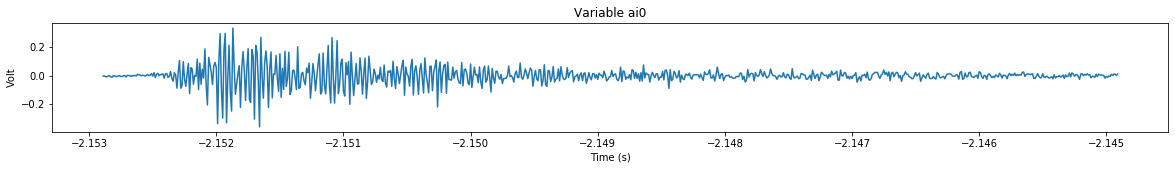

Flushing input history
Flushing input history


In [13]:
load_and_plot("./data/Ramp4/", "ai0", (-2.1529, -2.1529 + 8e-3))

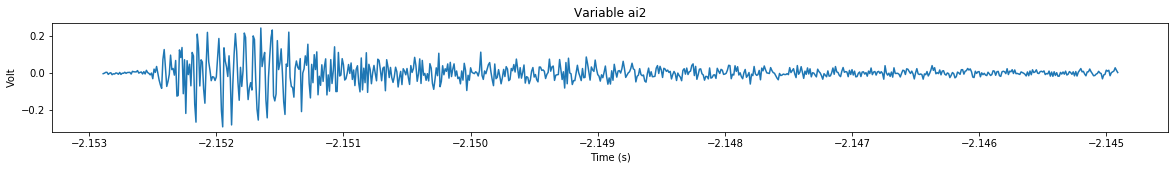

Flushing input history
Flushing input history


In [26]:
load_and_plot("./data/Ramp4/", "ai2", (-2.1529, -2.1529 + 8e-3))

In [4]:
print("Average RMS: ", average_rms("./data/Ramp4/", (-2.1529, -2.1529 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp4/", (-2.1529, -2.1529 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.04004120607353345
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.38148099184036255


### Ramp 5

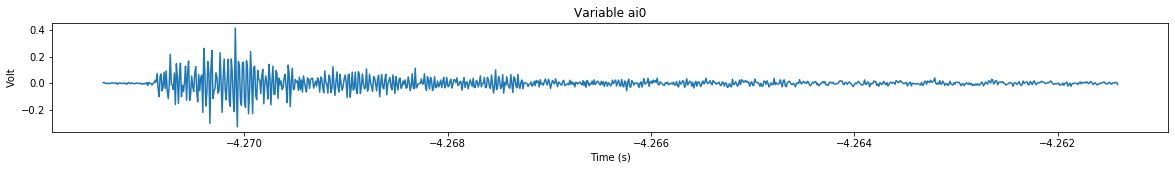

Flushing input history
Flushing input history


In [6]:
load_and_plot("./data/Ramp5/", "ai0",  (-4.2714, -4.2714 + 8e-3))

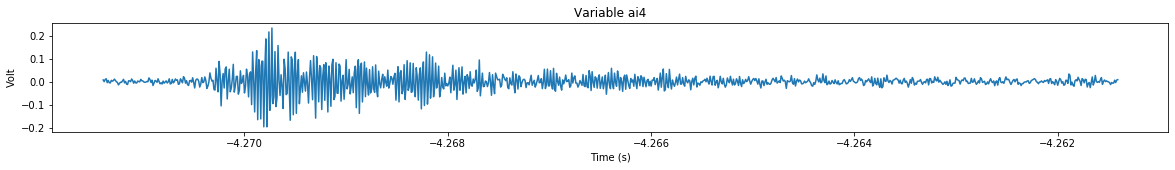

Flushing input history
Flushing input history


In [10]:
load_and_plot("./data/Ramp5/", "ai4",  (-4.2714, -4.2714 + 10e-3))

In [14]:
print("Average RMS: ", average_rms("./data/Ramp5/",  (-4.2714, -4.2714 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp5/",  (-4.2714, -4.2714 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.04542475750667506
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.5654863938689232


### Ramp 20

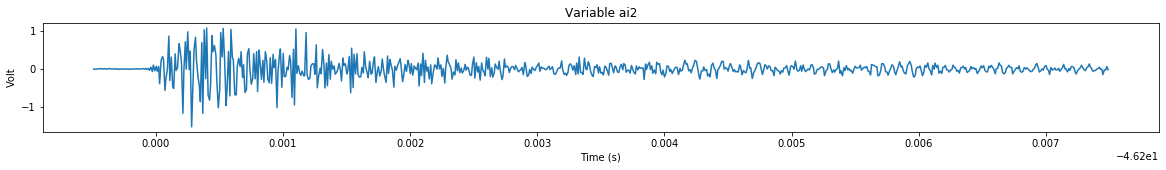

Flushing input history
Flushing input history


In [24]:
load_and_plot("./data/Ramp20/", "ai2",  (-46.2005, -46.2005 + 8e-3))

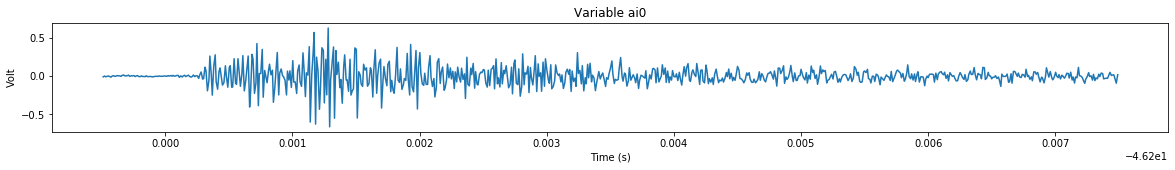

Flushing input history
Flushing input history


In [27]:
load_and_plot("./data/Ramp20/", "ai0",  (-46.2005, -46.2005 + 8e-3))

In [25]:
print("Average RMS: ", average_rms("./data/Ramp20/",  (-46.2005, -46.2005 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp20/",  (-46.2005, -46.2005 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.11131021382522599
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.9569375142455101


### Ramp 21

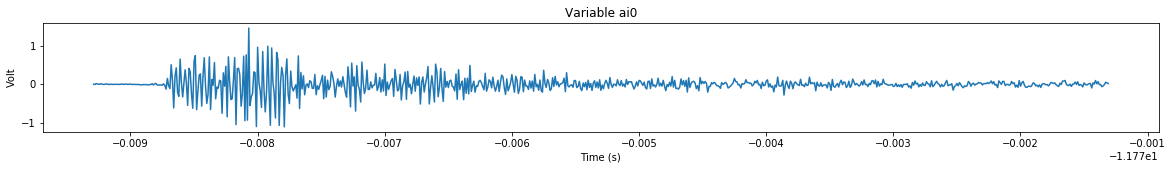

Flushing input history
Flushing input history


In [60]:
load_and_plot("./data/Ramp21/", "ai0",  (-11.7791, -11.7791 + 8e-3))

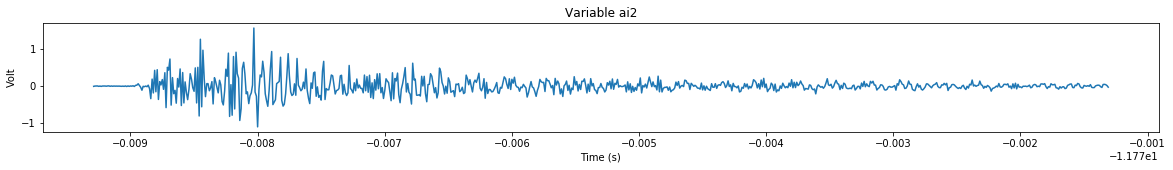

Flushing input history
Flushing input history


In [59]:
load_and_plot("./data/Ramp21/", "ai2",  (-11.7791, -11.7791 + 8e-3))

In [61]:
print("Average RMS: ", average_rms("./data/Ramp21/",   (-11.7791, -11.7791 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp21/",   (-11.7791, -11.7791 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.15053608869900925
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  1.641722396016121


### Ramp 25

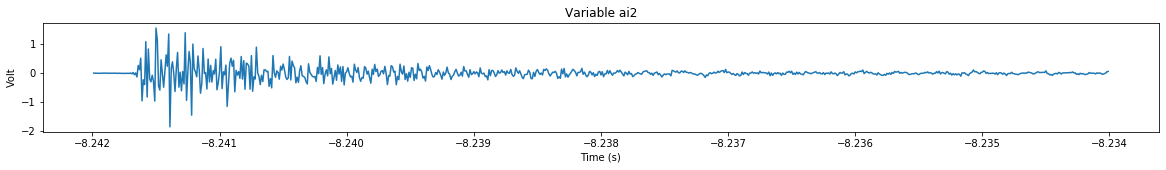

Flushing input history
Flushing input history


In [50]:
load_and_plot("./data/Ramp25/", "ai2",  (-8.242, -8.242 + 8e-3))

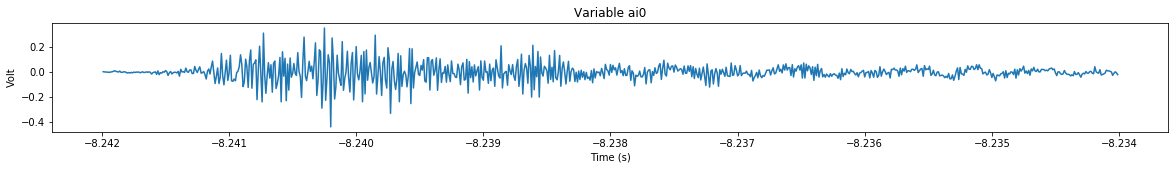

Flushing input history
Flushing input history


In [28]:
load_and_plot("./data/Ramp25/", "ai0",  (-8.242, -8.242 + 8e-3))

In [54]:
print("Average RMS: ", average_rms("./data/Ramp25/", (-8.242, -8.242 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp25/", (-8.242, -8.242 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.07051630122808551
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.8586371652781963


### Ramp 28

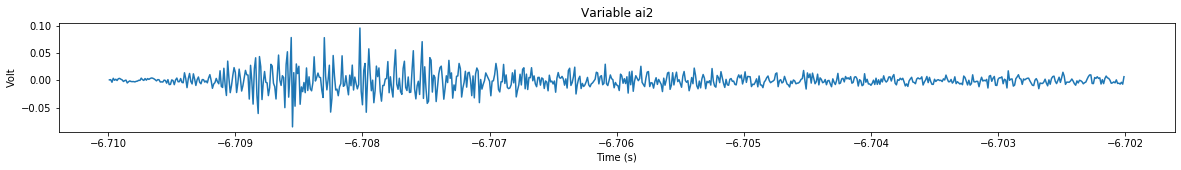

Flushing input history
Flushing input history


In [5]:
load_and_plot("./data/Ramp28/", "ai2",  (-6.71, -6.71 + 8e-3))

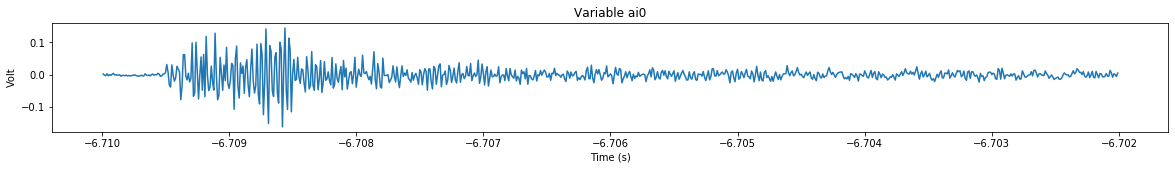

Flushing input history
Flushing input history


In [6]:
load_and_plot("./data/Ramp28/", "ai0",  (-6.71, -6.71 + 8e-3))

In [7]:
print("Average RMS: ", average_rms("./data/Ramp28/", (-6.71, -6.71 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp28/", (-6.71, -6.71 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.024631969507163547
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.30761092342436314


### Ramp 29

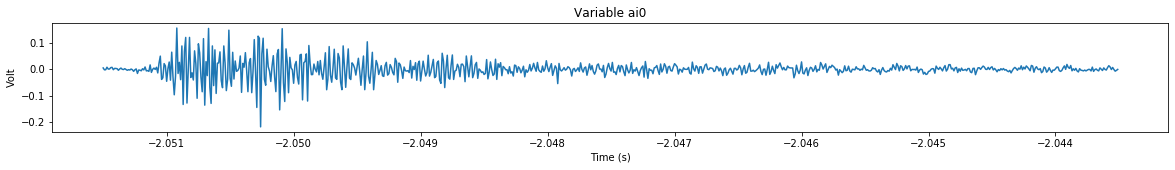

Flushing input history
Flushing input history


In [17]:
load_and_plot("./data/Ramp29/", "ai0",  (-2.0515, -2.0515 + 8e-3))

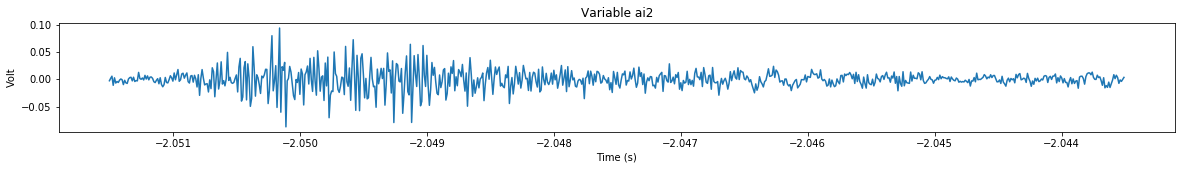

Flushing input history
Flushing input history


In [18]:
load_and_plot("./data/Ramp29/", "ai2",  (-2.0515, -2.0515 + 8e-3))

In [20]:
print("Average RMS: ", average_rms("./data/Ramp29/", (-2.0515, -2.0515 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp29/", (-2.0515, -2.0515 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.026149584217928346
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.33165775053203106


### Ramp 30

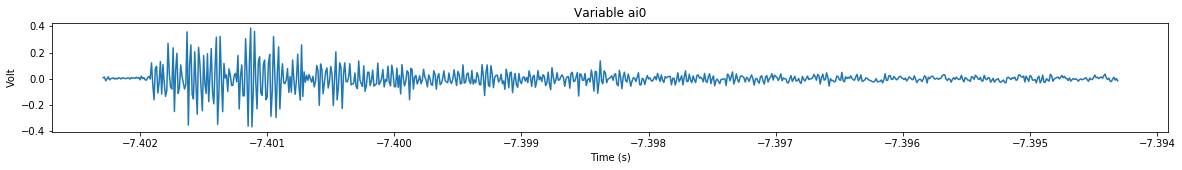

Flushing input history
Flushing input history


In [23]:
load_and_plot("./data/Ramp30/", "ai0",  (-7.4023, -7.4023 + 8e-3))

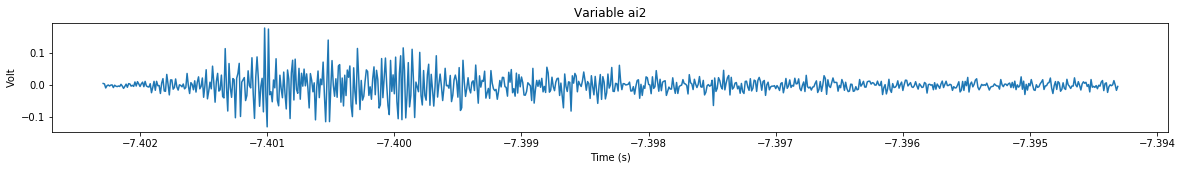

Flushing input history
Flushing input history


In [24]:
load_and_plot("./data/Ramp30/", "ai2",  (-7.4023, -7.4023 + 8e-3))

In [25]:
print("Average RMS: ", average_rms("./data/Ramp29/", (-7.4023, -7.4023 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp29/", (-7.4023, -7.4023 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.0032031796732742584
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.020862912759184837


## Plot R.M.S with current

Text(0, 0.5, 'R.M.S value [V]')

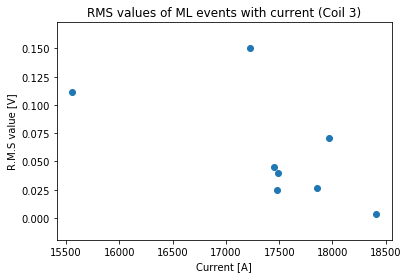

In [37]:
x = [17486,
17449,
15556,
17226,
17966,
17482,
17854,
18412]

y = [0.04004120607353345,
0.04542475750667506,
0.11131021382522599,
0.15053608869900925,
0.07051630122808551,
0.024631969507163547,
0.026149584217928346,
0.0032031796732742584,]

plt.scatter(x,y)
plt.title("RMS values of ML events with current (Coil 3)")
plt.xlabel("Current [A]")
plt.ylabel("R.M.S value [V]")

## Max amplitude with current

Text(0, 0.5, 'Max amplitude [V]')

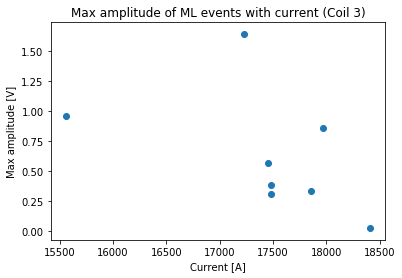

In [38]:
x1 = [17486,
17449,
15556,
17226,
17966,
17482,
17854,
18412]

y1 = [0.38148099184036255,
0.5654863938689232,
0.9569375142455101,
1.641722396016121,
0.8586371652781963,
0.30761092342436314,
0.33165775053203106,
0.020862912759184837]

plt.scatter(x1,y1) 
plt.title("Max amplitude of ML events with current (Coil 3)")
plt.xlabel("Current [A]")
plt.ylabel("Max amplitude [V]")

# Coil 5

## Ramp 23

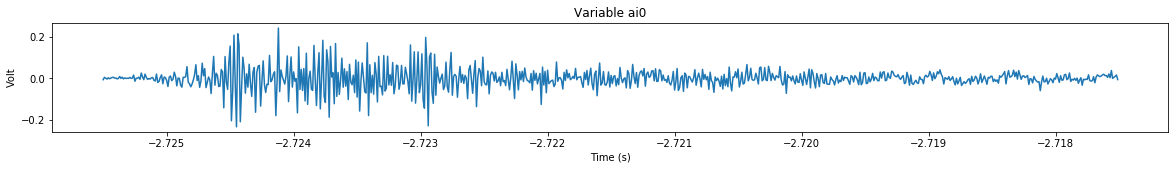

Flushing input history
Flushing input history


In [51]:
load_and_plot("./data/Ramp23/", "ai0",  (-2.7255, -2.7255 + 8e-3))

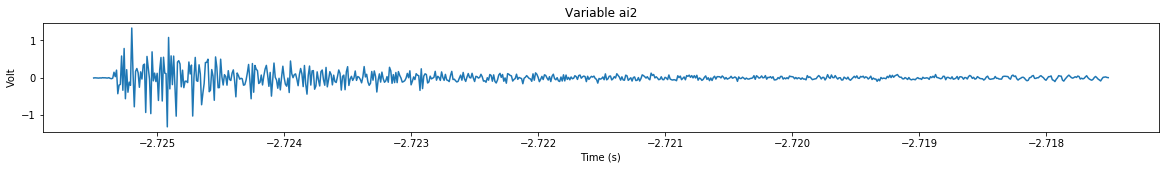

Flushing input history
Flushing input history


In [50]:
load_and_plot("./data/Ramp23/", "ai2",  (-2.7255, -2.7255 + 8e-3))

In [52]:
print("Average RMS: ", average_rms("./data/Ramp23/",(-2.7255, -2.7255 + 8e-3)))
print("Average Max Amplitude: ", average_max_amp("./data/Ramp23/", (-2.7255, -2.7255 + 8e-3)))

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average RMS:  0.06047512691002338
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Average Max Amplitude:  0.6414633262902498


## Ramp 24

### Event 1